In [1]:
import os
import pandas as pd
import glob 
import matplotlib.pyplot as plt
import numpy as np

In [2]:
file_pattern = os.path.join("..", "data", "raw", "*.csv")
file_list = glob.glob(file_pattern) 

In [3]:
file_list

['..\\data\\raw\\1_2025-05-25_16-42.csv',
 '..\\data\\raw\\1_2025-06-18_20-19.csv',
 '..\\data\\raw\\2_2025-05-25_16-42.csv',
 '..\\data\\raw\\2_2025-06-18_20-19.csv',
 '..\\data\\raw\\3_2025-05-25_16-43.csv',
 '..\\data\\raw\\3_2025-06-18_20-20.csv']

In [4]:
main_dataframe = pd.read_csv(file_list[0])
for i in range(1, len(file_list)): 
    data = pd.read_csv(file_list[i]) 
    df = pd.DataFrame(data) 
    main_dataframe = pd.concat([main_dataframe, df], axis=0) 

In [5]:
main_dataframe

,author,author_type,url,location,deal_type,accommodation_type,floor,floors_count,rooms_count,total_meters,price_per_month,commissions,price,district,street,house_number,underground,residential_complex
0,Alpha Star Properties,real_estate_agent,https://www.cian.ru/sale/flat/315745436/,Москва,sale,flat,25,61,1,60.0,-1,0,75000000,Пресненский,Краснопресненская набережная,14Ак1,Москва-Сити,Capital Towers
1,White and Broughton,real_estate_agent,https://www.cian.ru/sale/flat/313640113/,Москва,sale,flat,6,41,1,40.1,-1,0,35500000,Хорошевский,Ленинградский проспект,37/5,Аэропорт,Прайм Парк
2,ГЕЛИОС,real_estate_agent,https://www.cian.ru/sale/flat/317161765/,Москва,sale,flat,6,9,1,21.0,-1,0,7950000,Бабушкинский,Енисейская,17К3,Бабушкинская,NaN
3,Татьяна Серебрякова,realtor,https://www.cian.ru/sale/flat/314672030/,Москва,sale,flat,14,16,1,40.0,-1,0,12700000,Марьино,Новомарьинская,16К1,Братиславская,NaN
4,MHEstate - Элитная недвижимость,real_estate_agent,https://www.cian.ru/sale/flat/316213381/,Москва,sale,flat,14,41,1,48.0,-1,0,29900000,Раменки,1-й Сетуньский проезд,8,Кутузовская,Hide
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,Whitewill,real_estate_agent,https://www.cian.ru/sale/flat/318570002/,Москва,sale,flat,53,68,3,102.0,-1,0,98000000,Пресненский,1-й Красногвардейский проезд,22с1,Москва-Сити,NEVA TOWERS
118,Intermark Real Estate,real_estate_agent,https://www.cian.ru/sale/flat/316587126/,Москва,sale,flat,7,9,3,160.8,-1,0,244011849,Тверской,1-я Тверская-Ямская,2А,Маяковская,Vesper Tverskaya
119,Apple Real Estate,real_estate_agent,https://www.cian.ru/sale/flat/286643532/,Москва,sale,flat,4,8,3,69.8,-1,0,51421888,Хамовники,Смоленский бульвар,22/14,Смоленская,NaN
120,Whitewill,real_estate_agent,https://www.cian.ru/sale/flat/303727554/,Москва,sale,flat,5,7,3,116.8,-1,0,357500000,Тверской,Большая Дмитровка,7/5С2,Савёловская,Советник


In [6]:
main_dataframe['url_id'] = main_dataframe['url'].map(lambda x: x.split('/')[-2])
new_dataframe = main_dataframe[['url_id', 'total_meters', 'price']].set_index('url_id')

<Axes: >

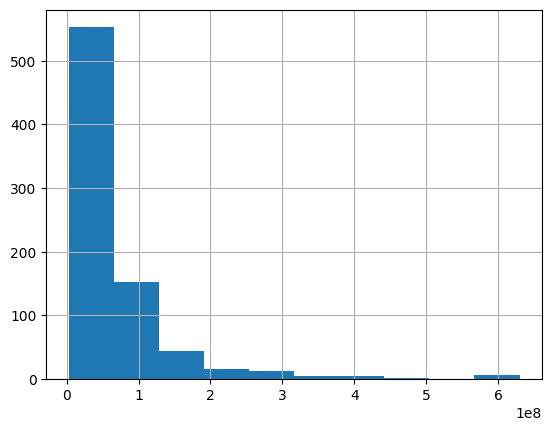

In [7]:
new_dataframe['price'].hist()


In [8]:
new_df = new_dataframe[new_dataframe['price'] < 100_000_000]
new_df = new_df[new_df['total_meters'] < 100]

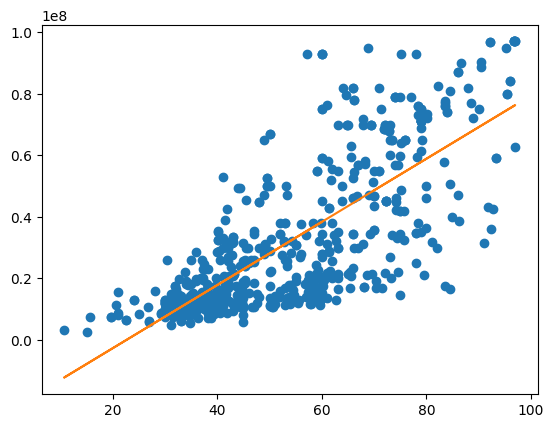

In [9]:
x = new_df['total_meters']
y = new_df['price']

plt.plot(x, y, 'o')

m, b = np.polyfit(x, y, 1)

plt.plot(x, m*x+b)

In [10]:
train_path_dir = os.path.join("..", "data", "processed")
if not os.path.exists(train_path_dir):
    os.mkdir(train_path_dir)

train_file_path = os.path.join(train_path_dir, "train.csv")

In [11]:
new_df.to_csv(train_file_path)
